# Assignment 7
### Do any five.

## 1. 

- What is the expected value of a single die roll? 
- What is the expected value of rolling two dice and adding the results together?
- What is the expected winnings of any gamble in European roulette?

- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?
- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

![](./7_images/1.png)

## 2. 
- Compute the expected value for a uniform random variable.
- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$
- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

![](./7_images/2.png)

Expected Value: 0.3335487344715367
Value of Expectation: 0.25008457791878663


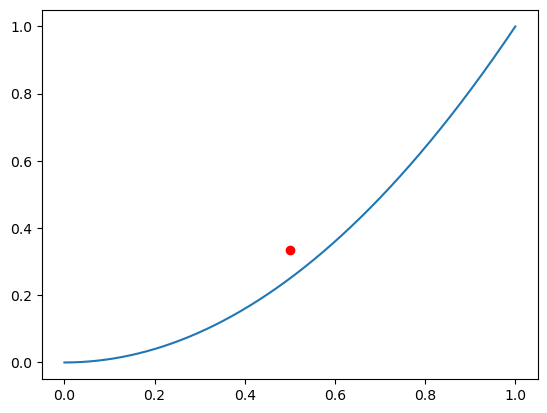

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def v(x):
    return np.square(x)

sample = np.random.uniform(low=0, high=1, size=20000)
Ev_of_sample = np.mean(v(sample))
print(f'Expected Value: {Ev_of_sample}')

v_of_EX = v(np.mean(sample))
print(f'Value of Expectation: {v_of_EX}')

sns.lineplot(x=sample, y=v(sample))
plt.plot(np.mean(sample), Ev_of_sample, 'ro')


## 3. 
- Compute the variance for a uniform random variable.
- Show that 
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$
$$
\mathbb{V}[a+bX] = b^2 \mathbb{V}[X]
$$
- Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a+ b \mathbb{E}[X]$ and variance $b^2 \sigma_X^2$ 

These properties get used all the time!


## 4.

- The **covariance** of $X$ and $Y$ is
$$
\text{cov}(X,Y) = \int_{y} \int_{x} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{XY}(x,y) dxdy = \mathbb{E}_{XY}[ (x-\mu_X)(y-\mu_Y)]
$$
- Show that if $f_{XY}(x,y)=f_X(x)f_Y(y)$, then $\text{cov}(X,Y)=0$
- Provide an example (computation/simulation is fine) where $\text{cov}(X,Y)\approx 0$ but $f_{XY}(x,y)\neq 0$
- The covariance doesn't characterize joint random variables except in a few special cases: The covariance only captures the **linear** association between the two variables, not nonlinear associations.

## 5. 

Suppose $X$ has an expectation $\mathbb{E}[X]<\infty$ and variance $\mathbb{V}[X]<\infty$; this isn't always true, but is *usually* true
- Consider making a new variable, $\varepsilon = X - \mathbb{E}[X]$
- What's the expectation of $\varepsilon$?
- What's the variance of $\varepsilon$?
- So we can write any random variable in the form $X = \mathbb{E}[X] + \varepsilon, $ where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon] = \sigma_X^2$
- If that's true, show that we can also write any random variable in the form $X = \mathbb{E}[X] + \sigma_X \varepsilon$, where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon]=1$
- Now replace $\mathbb{E}[X]$ with $x\beta$, and the stage is set for regression models

![](./7_images/5.png)

## 6.
- Use the Taylor series expansions 
$$
F(x+h) = F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3)
$$ 
and 
$$
F(x-h) = F(x) - h f(x) + \frac{h^2}{2} f'(x)+ O(h^3)
$$
to show that
$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x+h)-F(x-h)}{2h} = f(x) + O(h^2),
$$
so the **bias** of the KDE is $O(h^2)$, unlike the ECDF, for which $\mathbb{E}[\hat{F}(x)] = F(x)$.

## 7.
- Suppose $X$ and $Y$ are distributed bivariate normal. Show that if $\rho=0$, then $X$ and $Y$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix, then $X_1, X_2, ..., X_n$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix and all the $\sigma_i^2$ and all the $\mu_i$ are equal, then $X_1, X_2, ..., X_n$ are independently distributed random variables with distribution $N(\mu, \sigma^2)$

## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.

In [4]:
import pandas as pd
import scipy as sp

<Axes: xlabel='Radio Therapy', ylabel='Count'>

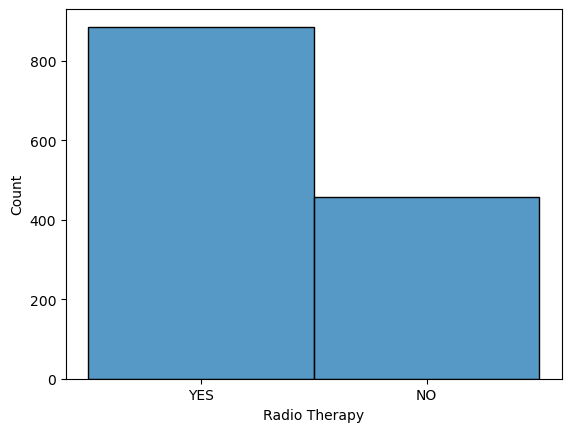

In [6]:
metabric = pd.read_csv('data/metabric.csv')
y = metabric['Radio Therapy']
sns.histplot(y)

![](./7_images/8.png)

MLE: 0.659717051377513


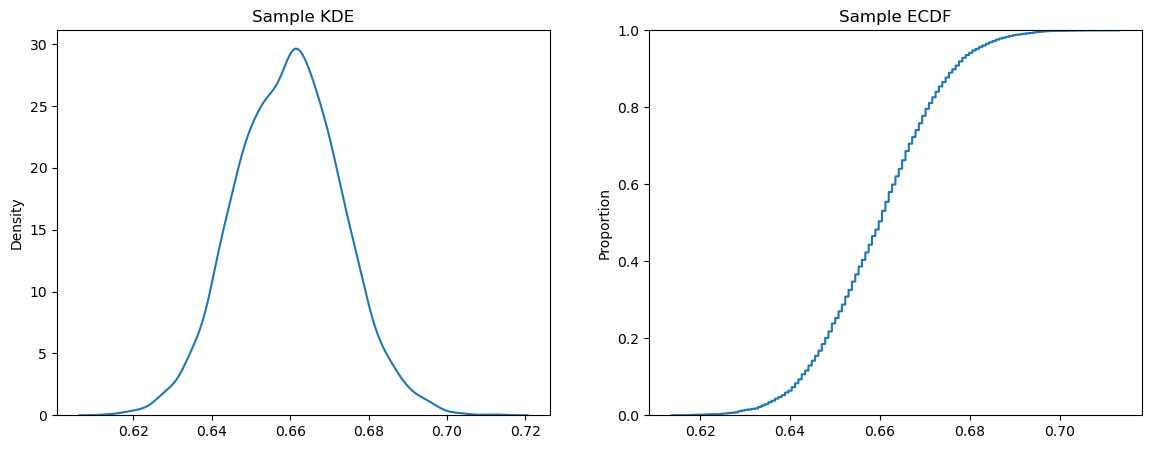

In [8]:
y = pd.to_numeric(y.replace({'NO': '0', 'YES': '1'}), errors='coerce')
print(f'MLE: {y.mean()}')

S = 5000
sample = [np.mean(y.sample(frac=1, replace=True)) for s in range(S)]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.kdeplot(sample, ax=axes[0], label='kde')
axes[0].set_title('Sample KDE')
sns.ecdfplot(sample, ax=axes[1], label='ecdf')
axes[1].set_title('Sample ECDF')
plt.show()

## 9.
- Open the Ames house price data. Make a KDE of 'price'. Select an appropriate distribution for modeling it, and explain why you selected it. (Hint: You might want to take a common transformation of price.)
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood. What is the MLE?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameters.

<Axes: xlabel='price', ylabel='Count'>

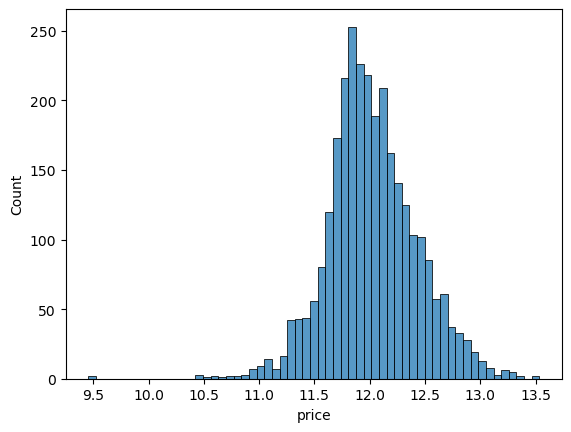

In [13]:
df = pd.read_csv('./data/ames_prices.csv')
y = np.log(df['price'])
sns.histplot(y)

The log of the price looks like it is normally distributed, centered at 12, because it mostly adheres to the standard bell-curve shape.

![](./7_images/9.png)

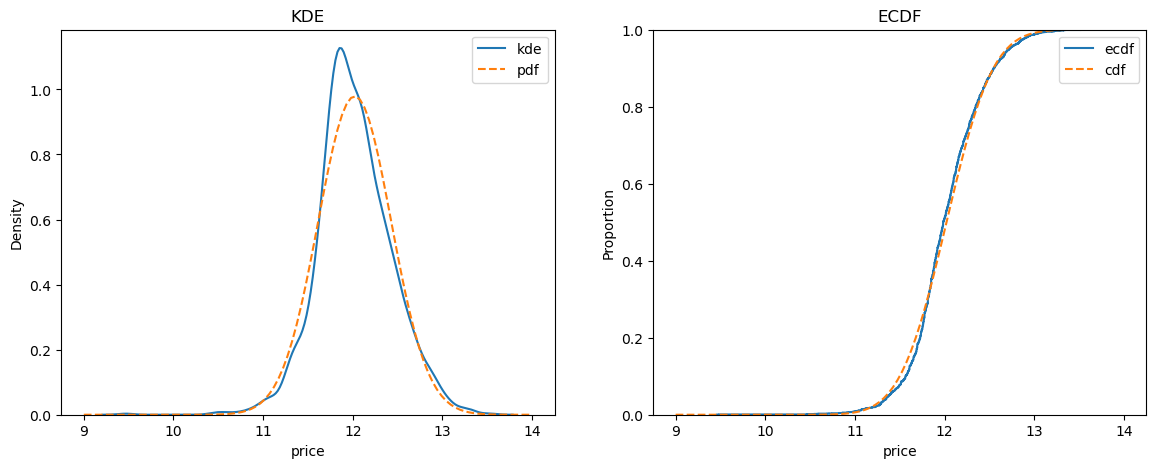

In [14]:
mu_hat = np.mean(y)
sigma_hat = np.sqrt(np.mean((y-mu_hat)**2))

grid = np.linspace(9,14,100)

pdf = sp.stats.norm.pdf(grid, loc=mu_hat, scale=sigma_hat)
cdf = sp.stats.norm.cdf(grid, loc=mu_hat, scale=sigma_hat)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=y, ax=axes[0], label='kde')
sns.lineplot(x=grid, y=pdf, ax=axes[0], label='pdf', linestyle='--')
axes[0].set_title('KDE')

sns.ecdfplot(x=y, ax=axes[1], label='ecdf')
sns.lineplot(x=grid, y=cdf, ax=axes[1], label='cdf', linestyle='--')
axes[1].set_title('ECDF')

plt.show()

The KDE has a peak that is slightly higher and to the left of the PDF, but the tails match well. The ECDF and CDF lines are overlapping for essentially the whole time.

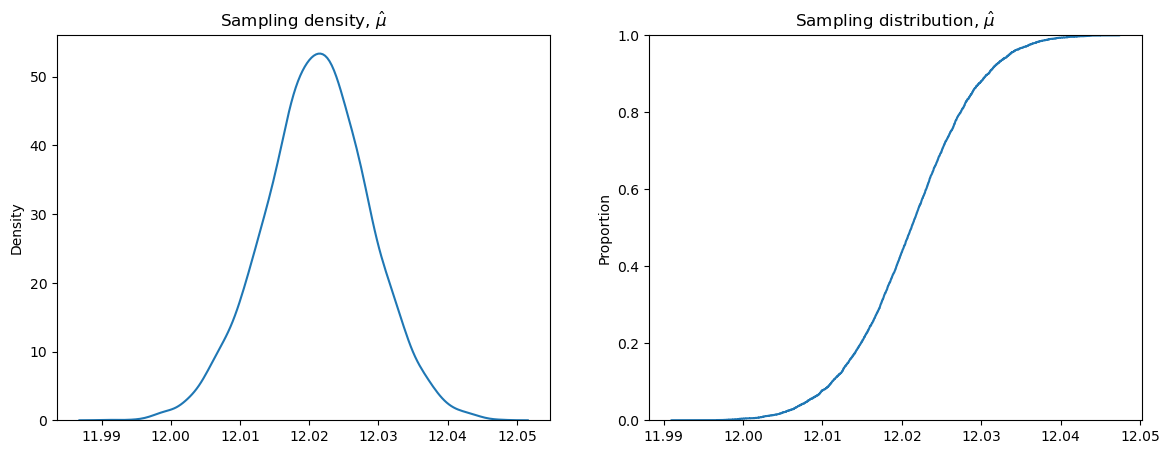

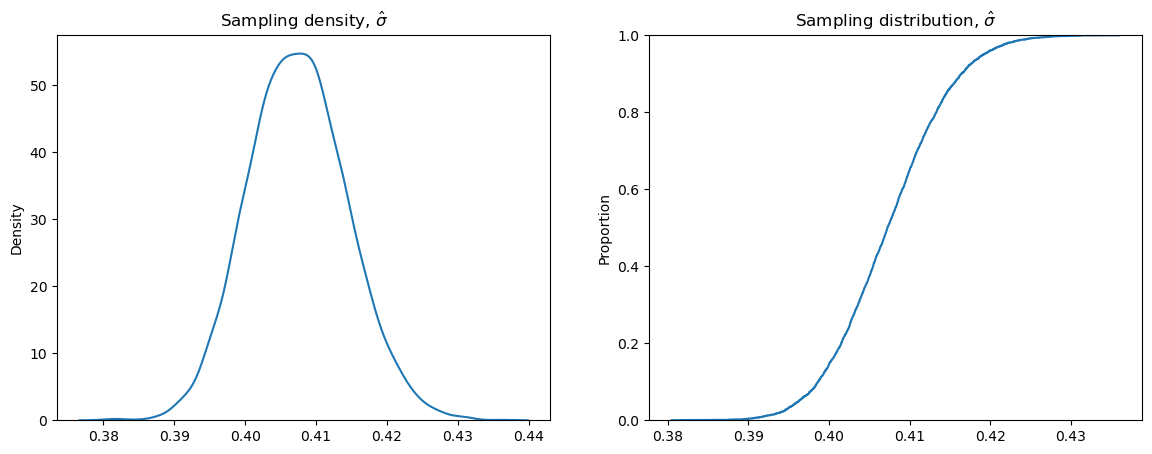

In [15]:
def mle(y):
    mu_hat = np.mean(y)
    sigma_hat = np.sqrt(np.mean((y-mu_hat)**2))
    return mu_hat, sigma_hat

S = 5000
sample = [mle(y.sample(frac=1.0, replace=True)) for s in range(S)]

mu_hat_sample = [row[0] for row in sample]
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(mu_hat_sample, ax=axes[0], label='kde')
axes[0].set_title('Sampling density, $\\hat{\\mu}$')

sns.ecdfplot(mu_hat_sample, ax=axes[1], label='ecdf')
axes[1].set_title('Sampling distribution, $\\hat{\\mu}$')

plt.show()

sigma_hat_sample = [row[1] for row in sample]
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(sigma_hat_sample, ax=axes[0], label='kde')
axes[0].set_title('Sampling density, $\\hat{\\sigma}$')

sns.ecdfplot(sigma_hat_sample, ax=axes[1], label='ecdf')
axes[1].set_title('Sampling distribution, $\\hat{\\sigma}$')

plt.show()

## 10.
- Open the METABRIC data. Make a KDE of 'Overall Survival (Months)'.
- Let survival time, $T$ be distributed exponentially with parameter $\lambda$. Then its distribution is
$$
F(t) = 1 - e^{-\lambda t} = p[T\le t].
$$
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood with respect to $\lambda$. What is the MLE, $\hat{\lambda}$?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of $\hat{\lambda}$.

## 11.
- Open the Ames house price data. Make a histogram of 'TotRms.AbvGrd', or total rooms above ground.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.

## 12.
- Open the METABRIC data. Make a histogram of 'Mutation Count' with around 50 bins. Let $Y$ be the mutation count the random variable, and $y_i$ the mutation count for patient $i$.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.